This project focuses on building and training a neural network to classify images from the CIFAR-10 dataset. This dataset contains 60,000 color images in 10 classes, such as airplanes, cars, and animals. The goal is to create a model that could effectively identify these categories.

# Step 1: Import Libraries

Import required libraries such as TensorFlow, NumPy, and Matplotlib.

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")


Libraries imported successfully.


# Step 2: Load and Preprocess the CIFAR-10 Dataset

Load CIFAR-10 from tf.keras.datasets.

Normalize the pixel values to a range of 0 to 1 for better model convergence.

In [ ]:
# Step 2: Load and Preprocess the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 1)


# Step 3: Define the Model

Use a sequential model.

Include a flatten layer to reshape the input images.

Add dense layers with activation functions (ReLU and Tanh).

Use a softmax layer for multi-class classification.

In [ ]:
# Step 3: Define the Model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten 32x32x3 images
    Dense(256, activation='relu'),  # Hidden layer with ReLU activation
    Dense(128, activation='tanh'),  # Hidden layer with Tanh activation
    Dense(10),  # Output layer for 10 classes
    Softmax()  # Apply softmax to normalize outputs
])

model.summary()  # Display model architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Compile the Model

Define the optimizer, loss function, and evaluation metrics.

In [ ]:
# Step 4: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

print("Model compiled successfully.")


Model compiled successfully.


# Step 5: Train the Model

Train the model for 20 epochs using a batch size of 64.

Use validation data to track model performance.

In [ ]:
# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=64)

print("Model training complete.")


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.2541 - loss: 2.0410 - val_accuracy: 0.3392 - val_loss: 1.8093
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.3713 - loss: 1.7396 - val_accuracy: 0.4018 - val_loss: 1.6783
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4195 - loss: 1.6261 - val_accuracy: 0.4270 - val_loss: 1.5972
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.4403 - loss: 1.5703 - val_accuracy: 0.4427 - val_loss: 1.5516
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4633 - loss: 1.5072 - val_accuracy: 0.4588 - val_loss: 1.5137
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4750 - loss: 1.4673 - val_accuracy: 0.4492 - val_loss: 1.5427
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4851 - loss: 1.4482 - val_accuracy: 0.4652 - val_loss: 1.4995
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4897 - loss: 1.4275 - 

# Step 6: Identify the Best Epoch

Use validation accuracy to find the epoch with the best performance.

In [ ]:
# Step 6: Identify the Best Epoch
best_epoch = np.argmax(history.history['val_accuracy'])
print(f"Best Epoch: {best_epoch + 1}")
print(f"Validation Accuracy at Best Epoch: {history.history['val_accuracy'][best_epoch]:.4f}")


Best Epoch: 19
Validation Accuracy at Best Epoch: 0.5047


The best epoch is chosen based on the highest validation accuracy because it indicates the epoch where the model performed optimally on data it has not seen during training. Beyond this point, the model may start overfitting, as training accuracy continues to improve, but validation accuracy may plateau or decrease.



# Step 7: Evaluate the Model on Test Data

Test the model on unseen data to calculate accuracy and loss.

In [ ]:
# Step 7: Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4854 - loss: 1.4656
Test Accuracy: 0.4833
Test Loss: 1.4762


# Step 8: Make a Prediction

Select a test image, make a prediction, and visualize the result.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


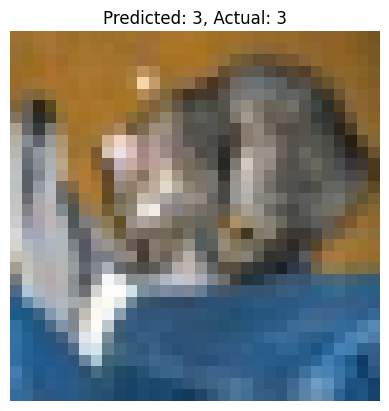

In [ ]:
# Step 8: Make a Prediction
sample_image = x_test[0]
predicted_class = np.argmax(model.predict(sample_image[np.newaxis]))
actual_class = y_test[0][0]

# Display the image and prediction
plt.imshow(sample_image)
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()
